In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [3]:
fashion_train.shape

(60000, 785)

In [4]:
X_train_fashion

NameError: name 'X_train_fashion' is not defined

In [17]:
y_test_fashion

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [5]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

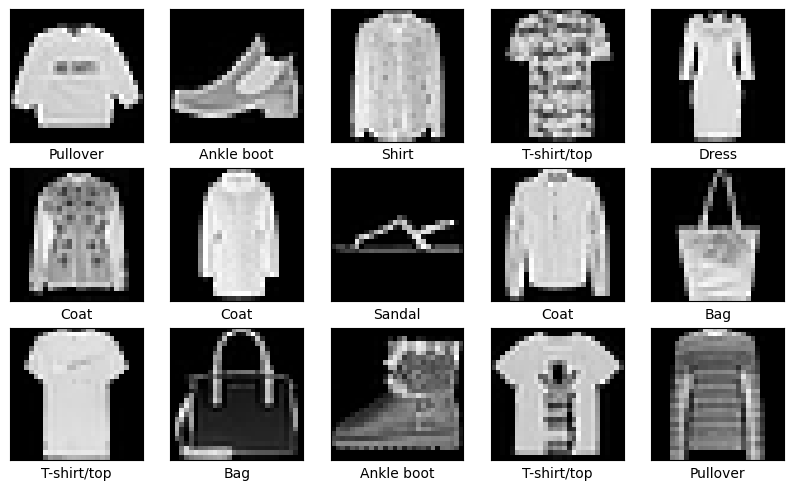

In [6]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [7]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [8]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Fitting the model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30,validation_data=(X_test_fashion, y_test_fashion))

C:\Anaconda3\envs\aimj\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.6364 - loss: 1.0674 - val_accuracy: 0.8119 - val_loss: 0.5391
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7485 - loss: 0.7451 - val_accuracy: 0.8437 - val_loss: 0.4745
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7728 - loss: 0.6758 - val_accuracy: 0.8329 - val_loss: 0.4682
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7864 - loss: 0.6395 - val_accuracy: 0.8497 - val_loss: 0.4359
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7984 - loss: 0.6057 - val_accuracy: 0.8493 - val_loss: 0.4329
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8028 - loss: 0.5983 - val_accuracy: 0.8575 - val_loss: 0.4351
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8072 - loss: 0.5831 - val_accuracy: 0.8473 - val_loss: 0.4395
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8087 - loss: 0.5769 - 

In [9]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8733 - loss: 0.4710


In [12]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8762


In [10]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


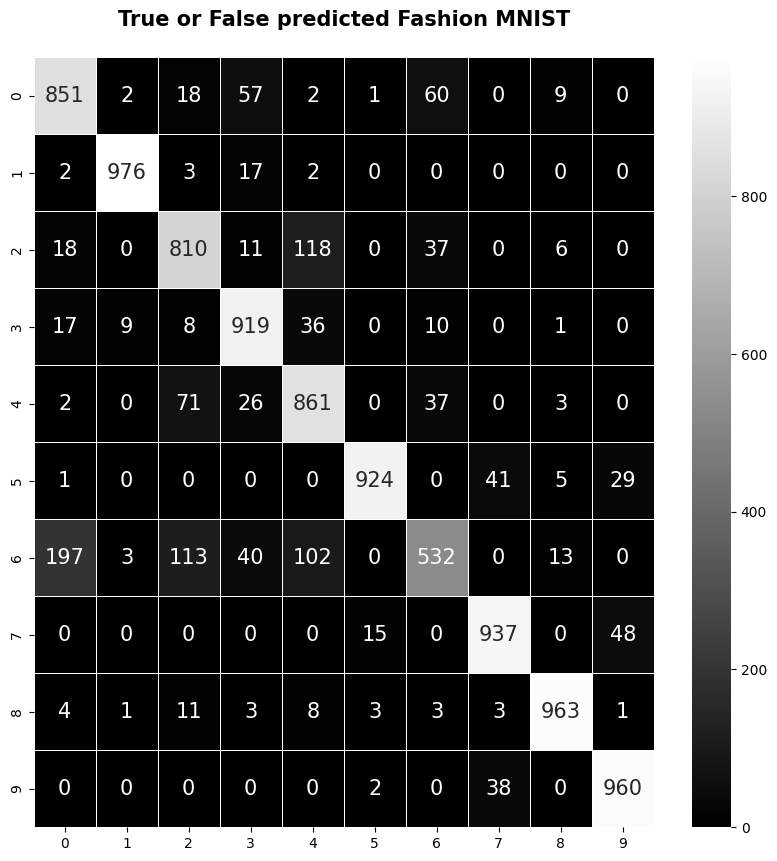

In [11]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
sns.set_palette('deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.98      0.98      0.98      1000
           2       0.78      0.81      0.80      1000
           3       0.86      0.92      0.89      1000
           4       0.76      0.86      0.81      1000
           5       0.98      0.92      0.95      1000
           6       0.78      0.53      0.63      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [13]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


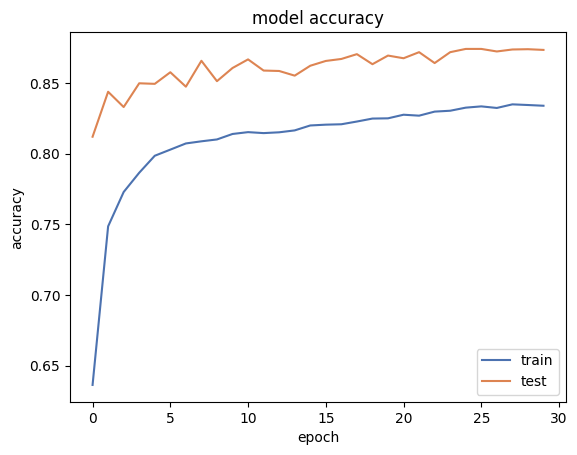

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


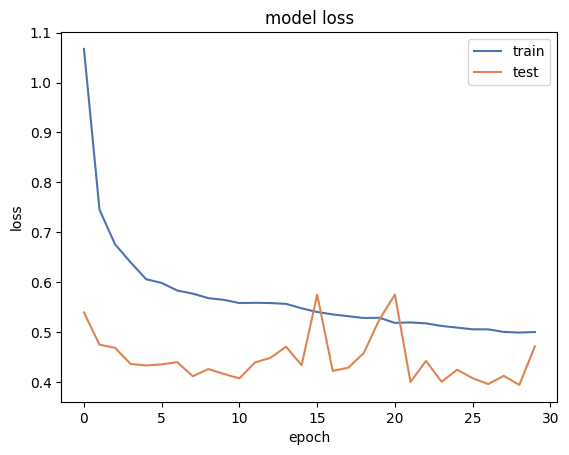

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [15]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


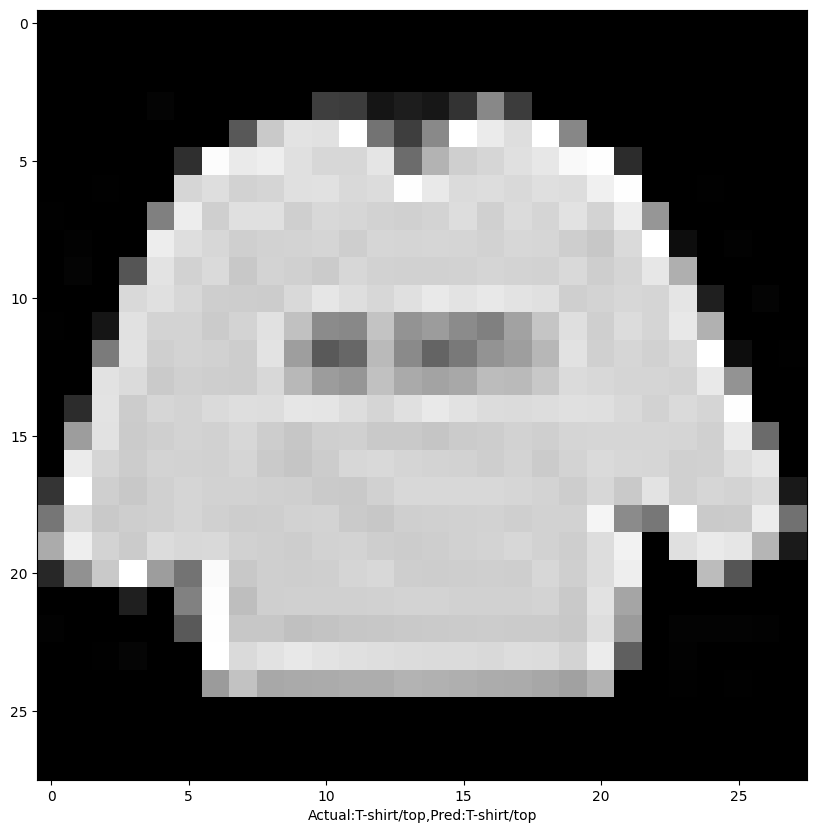

In [16]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()